In [1]:
#Importacion de las bibliotecas necesarias
import sqlalchemy

In [2]:
import pandas as pd
#Cargar el archivo CSV
df = pd.read_csv('traffic_accidents.csv')
# Mostrar las primeras filas del archivo
df.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


In [3]:
#Limpieza de datos
#Verificar si hay valores nulos
df.isnull().sum()

crash_date                       0
traffic_control_device           0
weather_condition                0
lighting_condition               0
first_crash_type                 0
trafficway_type                  0
alignment                        0
roadway_surface_cond             0
road_defect                      0
crash_type                       0
intersection_related_i           0
damage                           0
prim_contributory_cause          0
num_units                        0
most_severe_injury               0
injuries_total                   0
injuries_fatal                   0
injuries_incapacitating          0
injuries_non_incapacitating      0
injuries_reported_not_evident    0
injuries_no_indication           0
crash_hour                       0
crash_day_of_week                0
crash_month                      0
dtype: int64

In [4]:
'''Como no hay valores nulos, se procede a verificar los tipos de datos'''
#Verificar los tipos de datos
df.dtypes

crash_date                        object
traffic_control_device            object
weather_condition                 object
lighting_condition                object
first_crash_type                  object
trafficway_type                   object
alignment                         object
roadway_surface_cond              object
road_defect                       object
crash_type                        object
intersection_related_i            object
damage                            object
prim_contributory_cause           object
num_units                          int64
most_severe_injury                object
injuries_total                   float64
injuries_fatal                   float64
injuries_incapacitating          float64
injuries_non_incapacitating      float64
injuries_reported_not_evident    float64
injuries_no_indication           float64
crash_hour                         int64
crash_day_of_week                  int64
crash_month                        int64
dtype: object

In [5]:
df.duplicated(subset=['traffic_control_device', 'weather_condition', 'lighting_condition',
                      'first_crash_type', 'trafficway_type', 'alignment', 'roadway_surface_cond', 'road_defect'])

0         False
1         False
2         False
3         False
4         False
          ...  
209301     True
209302     True
209303     True
209304     True
209305     True
Length: 209306, dtype: bool

In [6]:
'''Como podemos ver, hay columnas y valores duplicadas, pero cada una tiene una fecha distinta en la que ocurrió el accidente. 
En este caso, no es recomendable eliminar esos valores o se estaría perdiendo información valiosa'''

'Como podemos ver, hay columnas y valores duplicadas, pero cada una tiene una fecha distinta en la que ocurrió el accidente. \nEn este caso, no es recomendable eliminar esos valores o se estaría perdiendo información valiosa'

In [7]:
#Convertir la columna 'crash_month' de string a entero
df['crash_month'] = df['crash_month'].astype(int)

#Verificar el cambio
print(df[['crash_month']].head())

   crash_month
0            7
1            8
2           12
3            8
4            8


In [8]:
#Convertir los números de mes a nombre de mes
import calendar                    #Usar la librería calendar para obtener los nombres de los meses

#Convertir el número de mes en nombre de mes
df['crash_month_name'] = df['crash_month'].apply(lambda x: calendar.month_name[x])

#Verificar el cambio
print(df[['crash_month', 'crash_month_name']].head())

   crash_month crash_month_name
0            7             July
1            8           August
2           12         December
3            8           August
4            8           August


In [9]:
#Contar los accidentes por mes para la gráfica
# Contar el número de accidentes por mes
accidents_by_month = df.groupby('crash_month_name').size()

# Asegúrate de que los meses estén ordenados correctamente
accidents_by_month = accidents_by_month[calendar.month_name[1:]]  # Esto asegura que los meses estén en orden

# Verificar el resultado
print(accidents_by_month)

crash_month_name
January      16606
February     14621
March        15265
April        15096
May          17432
June         17851
July         17834
August       18350
September    19018
October      20089
November     18328
December     18816
dtype: int64


/var/folders/w4/j2gr6gjx7zd5zyfw98ygfz100000gn/T/ipykernel_21104/1189666412.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accidents_by_month.index, y=accidents_by_month.values, palette='colorblind')


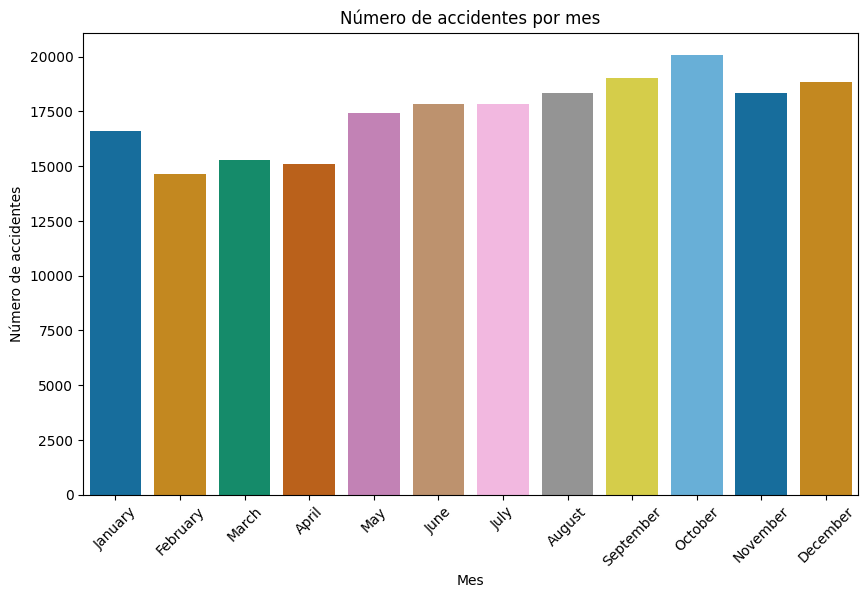

In [10]:
#Visualización de los datos
import matplotlib.pyplot as plt
import seaborn as sns

#Graficar los resultados
#Gráfico de barras de accidentes por mes
plt.figure(figsize=(10, 6))
sns.barplot(x=accidents_by_month.index, y=accidents_by_month.values, palette='colorblind')
plt.title('Número de accidentes por mes')
plt.xlabel('Mes')
plt.ylabel('Número de accidentes')
plt.xticks(rotation=45)  # Para que los nombres de los meses no se solapen
plt.show()

In [12]:
#Convertir la columna 'crash_date' de object a datetime
df['crash_date'] = pd.to_datetime(df['crash_date'], errors='coerce')

#Verificar el tipo de dato después de la conversión
print(df['crash_date'].dtype)

datetime64[ns]


In [13]:
'''Con el formato en datetime64(ns) se pueden realizar cálculos matemáticos, por lo que se puede extraer el año de
la variable crash_date en una nueva variable crash_year'''

'Con el formato en datetime64(ns) se pueden realizar cálculos matemáticos, por lo que se puede extraer el año de\nla variable crash_date en una nueva variable crash_year'

In [14]:
#Extraer el año de crash_date
df['crash_year'] = df['crash_date'].dt.year

#Verificar que 'crash_year' esté bien creado
print(df[['crash_date', 'crash_year']].head())

           crash_date  crash_year
0 2023-07-29 13:00:00        2023
1 2023-08-13 00:11:00        2023
2 2021-12-09 10:30:00        2021
3 2023-08-09 19:55:00        2023
4 2023-08-19 14:55:00        2023


In [15]:
#Contar el número de accidentes por año
accidents_by_year = df.groupby('crash_year').size()
print(accidents_by_year)

crash_year
2013        2
2015     1917
2016     7615
2017    17655
2018    27438
2019    27959
2020    22784
2021    25689
2022    25543
2023    25454
2024    26214
2025     1036
dtype: int64


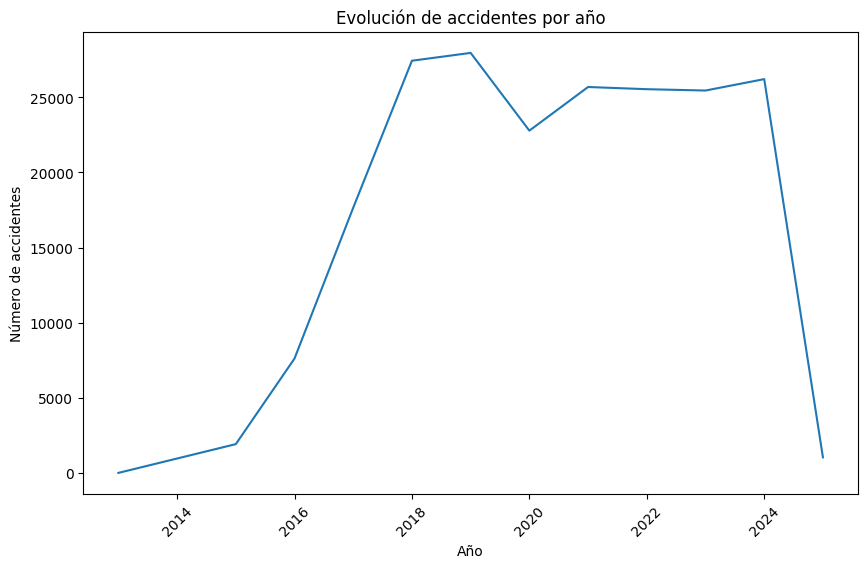

In [16]:
#Crear el gráfico de líneas para accidentes por año
plt.figure(figsize=(10, 6))
sns.lineplot(x=accidents_by_year.index, y=accidents_by_year.values)
plt.title('Evolución de accidentes por año')
plt.xlabel('Año')
plt.ylabel('Número de accidentes')
plt.xticks(rotation=45)
plt.show()

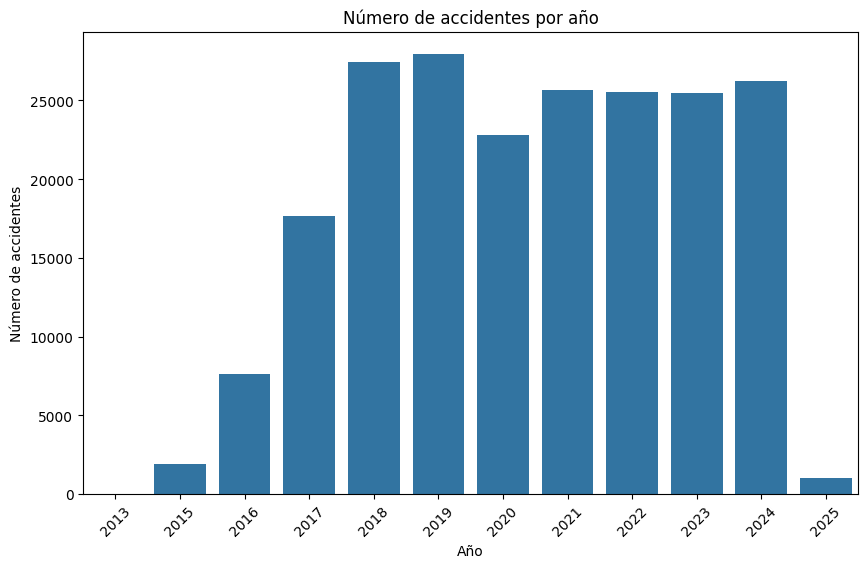

In [17]:
#Contar el número de accidentes por año
accidents_by_year = df.groupby('crash_year').size()

#Ordenar el índice para asegurar que los años estén en orden ascendente
accidents_by_year = accidents_by_year.sort_index()

#Crear el gráfico de barras para accidentes por año
plt.figure(figsize=(10, 6))
sns.barplot(x=accidents_by_year.index, y=accidents_by_year.values)
plt.title('Número de accidentes por año')
plt.xlabel('Año')
plt.ylabel('Número de accidentes')
plt.xticks(rotation=45)

#Mostrar el gráfico
plt.show()

In [18]:
import calendar  # Usar la librería calendar para obtener los nombres de los días

# Convertir los números del día de la semana (1-7) a nombre del día de la semana
df['crash_day_week_name'] = df['crash_day_of_week'].apply(lambda x: calendar.day_name[x - 1] if pd.notnull(x) else 'Desconocido')

# Verificar el cambio
print(df[['crash_day_of_week', 'crash_day_week_name']].head())

   crash_day_of_week crash_day_week_name
0                  7              Sunday
1                  1              Monday
2                  5              Friday
3                  4            Thursday
4                  7              Sunday


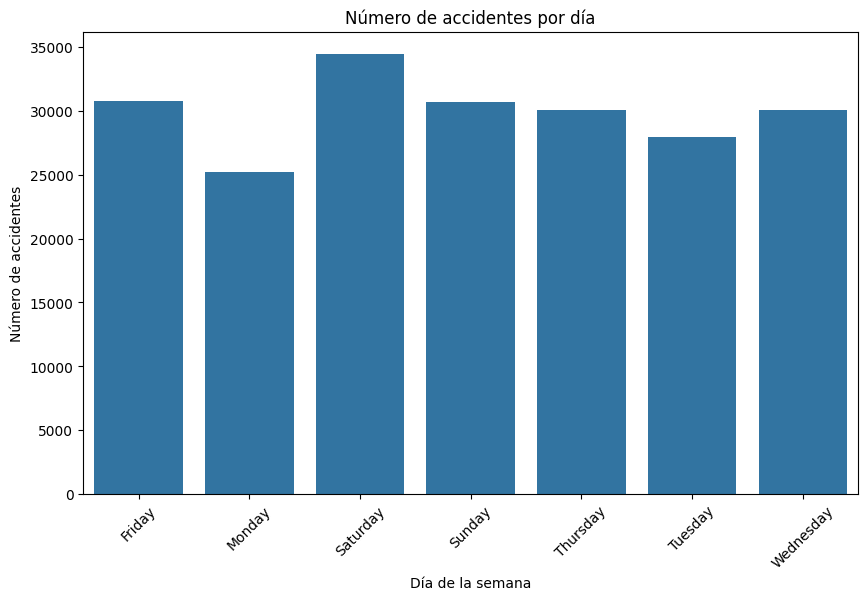

In [19]:
#Contar el número de accidentes por día
accidents_by_day = df.groupby('crash_day_week_name').size()

#Crear el gráfico de barras para accidentes por día
plt.figure(figsize=(10, 6))
sns.barplot(x=accidents_by_day.index, y=accidents_by_day.values)
plt.title('Número de accidentes por día')
plt.xlabel('Día de la semana')
plt.ylabel('Número de accidentes')
plt.xticks(rotation=45)

#Mostrar el gráfico
plt.show()

In [20]:
#Contar el número de accidentes por tipo de vía
accidentes_por_via = df['trafficway_type'].value_counts()
print(accidentes_por_via)

trafficway_type
NOT DIVIDED                        77753
FOUR WAY                           49057
DIVIDED - W/MEDIAN (NOT RAISED)    34221
ONE-WAY                            12341
DIVIDED - W/MEDIAN BARRIER         10720
T-INTERSECTION                      9233
OTHER                               4757
CENTER TURN LANE                    2862
UNKNOWN INTERSECTION TYPE           1885
FIVE POINT, OR MORE                 1119
UNKNOWN                             1060
Y-INTERSECTION                       958
TRAFFIC ROUTE                        776
ALLEY                                741
NOT REPORTED                         581
PARKING LOT                          448
RAMP                                 375
ROUNDABOUT                           149
DRIVEWAY                             143
L-INTERSECTION                       127
Name: count, dtype: int64


/var/folders/w4/j2gr6gjx7zd5zyfw98ygfz100000gn/T/ipykernel_21104/614477530.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accidentes_por_via.index, y=accidentes_por_via.values, palette='Set2')


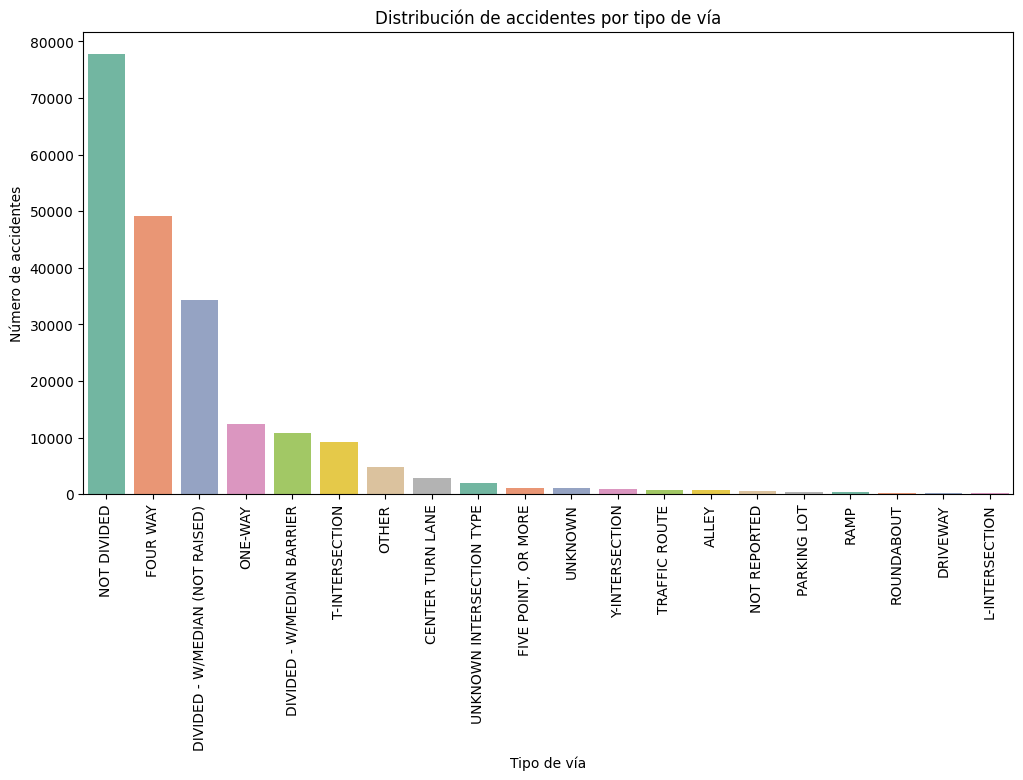

In [21]:
#Crear el gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(x=accidentes_por_via.index, y=accidentes_por_via.values, palette='Set2')
plt.xticks(rotation=90)  # Rotar etiquetas para mejor visualización
plt.xlabel('Tipo de vía')
plt.ylabel('Número de accidentes')
plt.title('Distribución de accidentes por tipo de vía')
plt.show()

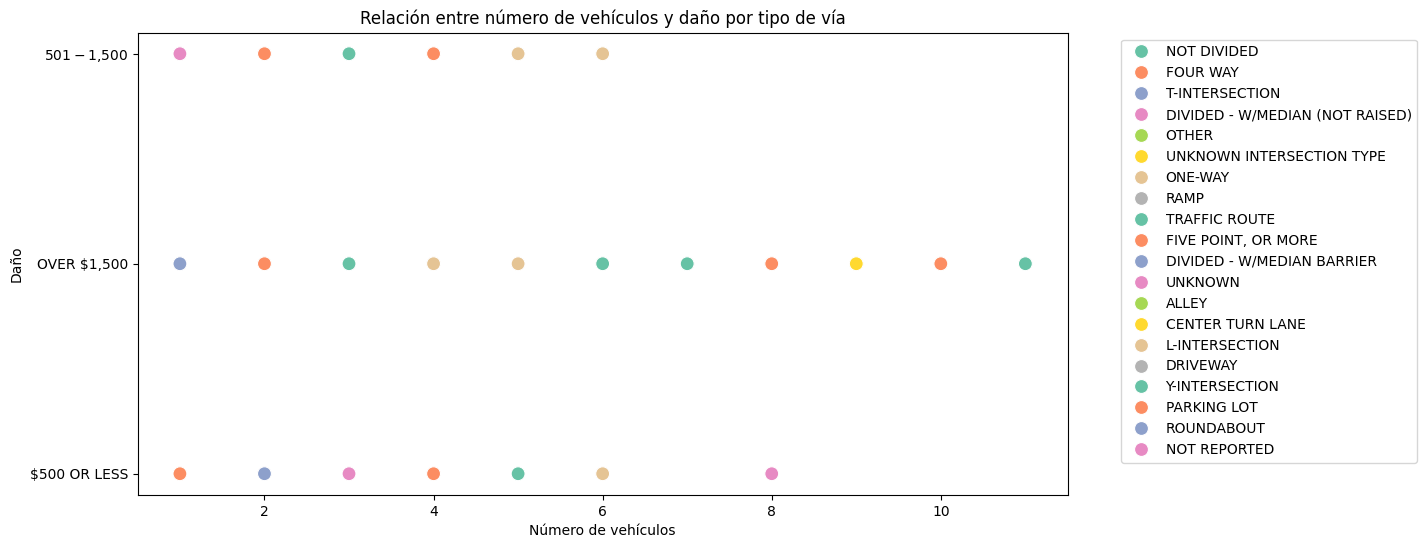

In [22]:
#Grafico de dispersion para relacionar el numero de vehiculos y daño por tipo de via
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='num_units', y='damage', hue='trafficway_type', palette='Set2', s=100)

plt.title('Relación entre número de vehículos y daño por tipo de vía')
plt.xlabel('Número de vehículos')
plt.ylabel('Daño')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Mover la leyenda para mejor visibilidad
plt.show()

In [23]:
'''CONCLUSION DE LA GRAFICA DE DISPERSION: A medida que el número de vehículos aumenta (más de 6 o 8 vehículos), la mayoría de los puntos se 
encuentran en niveles de daño mayores ($1,500+), lo cual tiene sentido porque colisiones con más autos suelen generar más daños.
Algunas categorías como FOUR WAY, NOT DIVIDED y TRAFFIC ROUTE aparecen en múltiples niveles de daño y con distintos números de vehículos, 
lo que sugiere que pueden ser lugares frecuentes de accidentes.
'''

'CONCLUSION DE LA GRAFICA DE DISPERSION: A medida que el número de vehículos aumenta (más de 6 o 8 vehículos), la mayoría de los puntos se \nencuentran en niveles de daño mayores ($1,500+), lo cual tiene sentido porque colisiones con más autos suelen generar más daños.\nAlgunas categorías como FOUR WAY, NOT DIVIDED y TRAFFIC ROUTE aparecen en múltiples niveles de daño y con distintos números de vehículos, \nlo que sugiere que pueden ser lugares frecuentes de accidentes.\n'

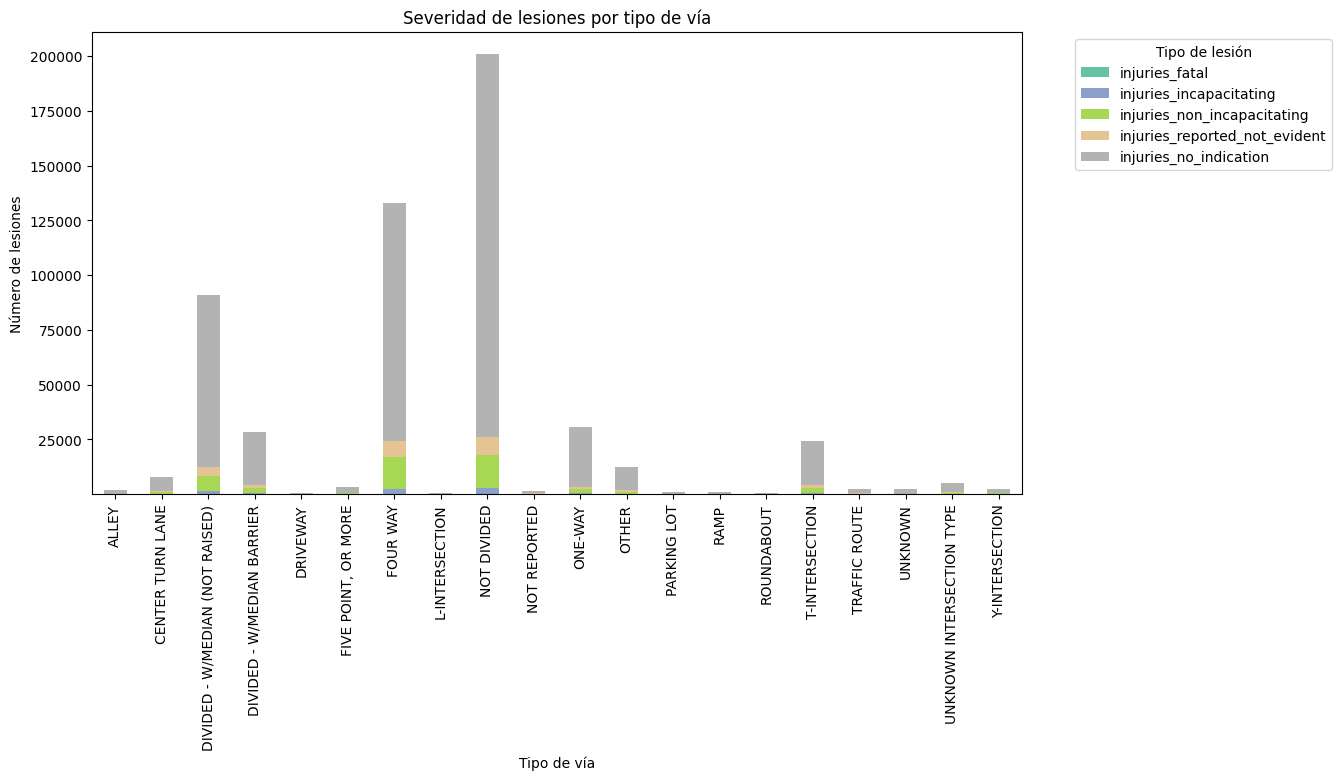

In [24]:
#Sumar lesiones por tipo de vía
lesiones_por_via = df.groupby('trafficway_type')[['injuries_fatal', 
                                                  'injuries_incapacitating', 
                                                  'injuries_non_incapacitating', 
                                                  'injuries_reported_not_evident', 
                                                  'injuries_no_indication']].sum()

# Crear gráfico de barras apiladas
lesiones_por_via.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')

plt.title('Severidad de lesiones por tipo de vía')
plt.xlabel('Tipo de vía')
plt.ylabel('Número de lesiones')
plt.xticks(rotation=90)  #Rotar etiquetas para mejor visualización
plt.legend(title='Tipo de lesión', bbox_to_anchor=(1.05, 1), loc='upper left')  #Mover leyenda
plt.show()

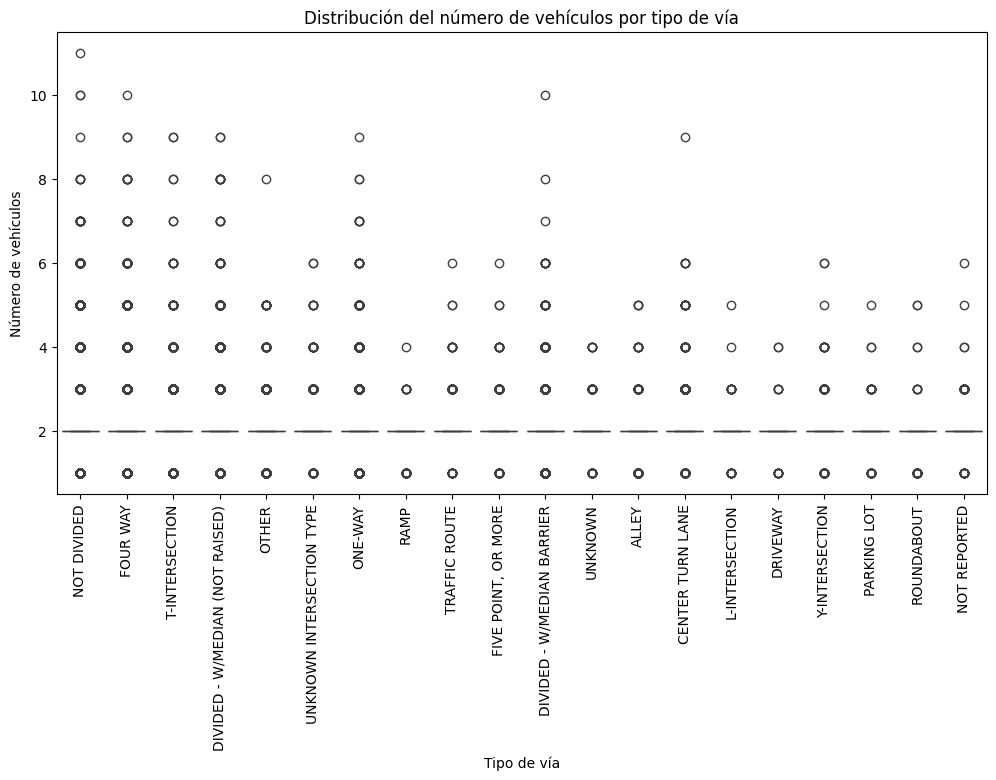

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='trafficway_type', y='num_units')
plt.xticks(rotation=90)  # Rotar etiquetas para mejor visualización
plt.title('Distribución del número de vehículos por tipo de vía')
plt.ylabel('Número de vehículos')
plt.xlabel('Tipo de vía')
plt.show()

In [26]:
#Importacion de dependencias para la transformacion de archivos
import mysql.connector
from mysql.connector import Error
import sqlite3
import json
from pymongo import MongoClient
import psycopg2
from cassandra.cluster import Cluster
from cassandra.query import SimpleStatement
from cassandra.io.libevreactor import LibevConnection

In [27]:
#Evidenciar la conversión del archivo csv a json
#Cargar el DataFrame (suponiendo que ya lo tienes en 'df')
df['crash_date'] = pd.to_datetime(df['crash_date'])  #Asegurar conversión a datetime
df['crash_date'] = df['crash_date'].dt.strftime('%Y-%m-%d %H:%M:%S')  #Formato legible

#Guardar en JSON
df.to_json('traffic_accidents.json', orient='records', lines=True)
print("JSON guardado con fechas en formato legible.")

JSON guardado con fechas en formato legible.


In [28]:
#Paso 2: Importar JSON a SQLite
df = pd.read_json('traffic_accidents.json', lines=True)
conn = sqlite3.connect('accidents.db')
df.to_sql('accidents', conn, if_exists='replace', index=False)
conn.close()
print("JSON importado a SQLite")

JSON importado a SQLite


In [29]:
#Paso 3: Migrar el archivo SQLite a MongoDB
conn = sqlite3.connect('accidents.db')
df = pd.read_sql_query("SELECT * FROM accidents", conn)
conn.close()
client = MongoClient('mongodb://localhost:27017/')
db = client['accident_db']
collection = db['accidents']
collection.insert_many(df.to_dict(orient='records'))
print('Archivo SQLite migrado a MongoDB con éxito.')

Archivo SQLite migrado a MongoDB con éxito.


In [30]:
#Paso 4: Migrar el archivo de MongoDB a DuckDB
import duckdb
db = client["accident_db"]
collection = db["accidents"]

#Convertir los datos de MongoDB a un DataFrame de Pandas
df = pd.DataFrame(list(collection.find()))
if "_id" in df.columns:
    df.drop("_id", axis=1, inplace=True)  #Eliminar la columna _id de MongoDB si existe

#Conectar a DuckDB y guardar en un archivo en disco
duckdb_conn = duckdb.connect("accidents.duckdb")
duckdb_conn.execute("CREATE TABLE accidents AS SELECT * FROM df")

#Verificar que los datos se guardaron correctamente
result = duckdb_conn.execute("SELECT * FROM accidents LIMIT 5").fetchdf()
print(result)

print("Datos guardados en el archivo 'accidents.duckdb'")

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

      crash_date traffic_control_device weather_condition  \
0  1690635600000         TRAFFIC SIGNAL             CLEAR   
1  1691885460000         TRAFFIC SIGNAL             CLEAR   
2  1639045800000         TRAFFIC SIGNAL             CLEAR   
3  1691610900000         TRAFFIC SIGNAL             CLEAR   
4  1692456900000         TRAFFIC SIGNAL             CLEAR   

       lighting_condition first_crash_type trafficway_type  \
0                DAYLIGHT          TURNING     NOT DIVIDED   
1  DARKNESS, LIGHTED ROAD          TURNING        FOUR WAY   
2                DAYLIGHT         REAR END  T-INTERSECTION   
3                DAYLIGHT            ANGLE        FOUR WAY   
4                DAYLIGHT         REAR END  T-INTERSECTION   

            alignment roadway_surface_cond road_defect  \
0  STRAIGHT AND LEVEL              UNKNOWN     UNKNOWN   
1  STRAIGHT AND LEVEL                  DRY  NO DEFECTS   
2  STRAIGHT AND LEVEL                  DRY  NO DEFECTS   
3  STRAIGHT AND LEVEL       

In [32]:
#Conversión del archivo json a csv

#Cargar el archivo JSON en un DataFrame
df = pd.read_json('traffic_accidents.json', orient='records', lines=True)
#Mostrar las primeras filas para verificar que se cargó correctamente
print(df.head())
#Convertir el DataFrame a un archivo CSV
df.to_csv('archivo_nuevo.csv', index=False)

print("El archivo CSV ha sido guardado correctamente.")

            crash_date traffic_control_device weather_condition  \
0  2023-07-29 13:00:00         TRAFFIC SIGNAL             CLEAR   
1  2023-08-13 00:11:00         TRAFFIC SIGNAL             CLEAR   
2  2021-12-09 10:30:00         TRAFFIC SIGNAL             CLEAR   
3  2023-08-09 19:55:00         TRAFFIC SIGNAL             CLEAR   
4  2023-08-19 14:55:00         TRAFFIC SIGNAL             CLEAR   

       lighting_condition first_crash_type trafficway_type  \
0                DAYLIGHT          TURNING     NOT DIVIDED   
1  DARKNESS, LIGHTED ROAD          TURNING        FOUR WAY   
2                DAYLIGHT         REAR END  T-INTERSECTION   
3                DAYLIGHT            ANGLE        FOUR WAY   
4                DAYLIGHT         REAR END  T-INTERSECTION   

            alignment roadway_surface_cond road_defect  \
0  STRAIGHT AND LEVEL              UNKNOWN     UNKNOWN   
1  STRAIGHT AND LEVEL                  DRY  NO DEFECTS   
2  STRAIGHT AND LEVEL                  DRY  NO DEF

In [33]:
import redis

#Convertir el CSV a Redis
r = redis.Redis(host="localhost", port=6379, db=0)

# Cargar CSV en un DataFrame
df = pd.read_csv("archivo_nuevo.csv")

# Insertar cada fila en Redis
for i, row in df.iterrows():
    r.hmset(f"accident:{i}", row.to_dict())

print("Datos insertados en Redis con éxito.")

/var/folders/w4/j2gr6gjx7zd5zyfw98ygfz100000gn/T/ipykernel_21104/127007707.py:11: DeprecationWarning: Redis.hmset() is deprecated. Use Redis.hset() instead.
  r.hmset(f"accident:{i}", row.to_dict())


Datos insertados en Redis con éxito.


In [35]:
#Obtener y mostrar algunas claves de Redis
keys = r.keys("accident:*")  #Obtiene todas las claves que comienzan con 'accident:'
print(f"Total de registros en Redis: {len(keys)}")

# Mostrar los primeros 5 registros
for key in keys[:5]:  # Muestra solo los primeros 5
    data = r.hgetall(key)  # Obtiene los datos en formato hash
    print(f"Clave: {key}")
    print(data)
    print("-" * 40)

Total de registros en Redis: 209306
Clave: accident:10850
{'crash_date': '2024-03-03 12:45:00', 'traffic_control_device': 'STOP SIGN/FLASHER', 'weather_condition': 'CLEAR', 'lighting_condition': 'DAYLIGHT', 'first_crash_type': 'PEDALCYCLIST', 'trafficway_type': 'FOUR WAY', 'alignment': 'STRAIGHT AND LEVEL', 'roadway_surface_cond': 'DRY', 'road_defect': 'NO DEFECTS', 'crash_type': 'INJURY AND / OR TOW DUE TO CRASH', 'intersection_related_i': 'Y', 'damage': '$501 - $1,500', 'prim_contributory_cause': 'UNABLE TO DETERMINE', 'num_units': '2', 'most_severe_injury': 'NONINCAPACITATING INJURY', 'injuries_total': '1', 'injuries_fatal': '0', 'injuries_incapacitating': '0', 'injuries_non_incapacitating': '1', 'injuries_reported_not_evident': '0', 'injuries_no_indication': '1', 'crash_hour': '12', 'crash_day_of_week': '1', 'crash_month': '3', 'crash_month_name': 'March', 'crash_year': '2024', 'crash_day_week_name': 'Monday'}
----------------------------------------
Clave: accident:44568
{'crash_d

In [36]:
#Pasar los datos a un JSON
r = redis.Redis(host="localhost", port=6379, db=0)

# Obtener todas las claves
keys = r.keys("accident:*")

# Recuperar los datos y guardarlos en JSON
data = {key.decode(): {k.decode(): v.decode() for k, v in r.hgetall(key).items()} for key in keys}

# Guardar en un archivo JSON
with open("redis_accidents.json", "w") as f:
    json.dump(data, f, indent=4)

print("Datos exportados a redis_accidents.json")

Datos exportados a redis_accidents.json
